In [1]:
import tensorflow as tf
keras = tf.keras
from keras import Sequential, Input
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.optimizers import Adam
import os

2023-09-17 13:07:41.217864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 13:07:43.147828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
cats = []
dogs = []
for fname in os.listdir('./catsdogs/train/cats'):
    img = load_img(f'./catsdogs/train/cats/{fname}')
    cats.append(img_to_array(img))
for fname in os.listdir('./catsdogs/validation/dogs'):
    img = load_img(f'./catsdogs/validation/dogs/{fname}')
    dogs.append(img_to_array(img))

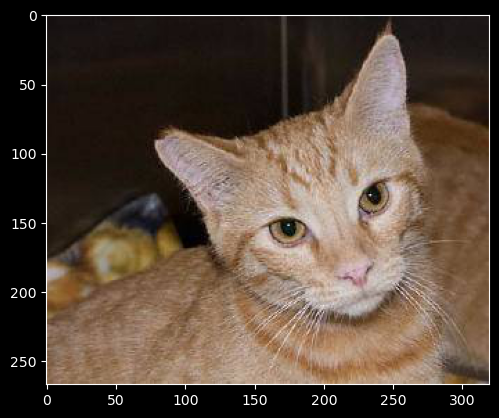

In [3]:
plt.imshow(plt.imread('catsdogs/train/cats/cat.14.jpg'))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = './catsdogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 1598 images belonging to 2 classes.


In [7]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 598 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 804 images belonging to 2 classes.


In [9]:
lenet_model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(6, (5, 5), padding="same", activation="tanh"),
    AveragePooling2D(strides=2),
    Conv2D(16, (5, 5), padding="valid", activation="tanh"),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(120, activation="sigmoid"),
    Dense(84, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="LeNet")
lenet_model.summary()

2023-09-17 13:08:09.354605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 13:08:09.835076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 13:08:09.835238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 13:08:09.876466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 13:08:09.876679: I tensorflow/compile

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416  

In [10]:
lenet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [11]:
lenet_hist = lenet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


2023-09-17 13:08:14.815651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-17 13:08:15.583877: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-17 13:08:16.023379: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f278c024bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 13:08:16.023548: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-09-17 13:08:16.067308: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 13:08:16.587317: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-17 13:08:16.723298: I ./tensorflow/compiler/jit/device_

80/80 [==============================] - 28s 281ms/step - loss: 0.7007 - acc: 0.5063 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/20
80/80 [==============================] - 22s 274ms/step - loss: 0.6975 - acc: 0.5019 - val_loss: 0.6907 - val_acc: 0.5468
Epoch 3/20
80/80 [==============================] - 21s 257ms/step - loss: 0.6934 - acc: 0.5125 - val_loss: 0.6852 - val_acc: 0.5485
Epoch 4/20
80/80 [==============================] - 22s 276ms/step - loss: 0.6905 - acc: 0.5344 - val_loss: 0.6878 - val_acc: 0.5569
Epoch 5/20
80/80 [==============================] - 20s 253ms/step - loss: 0.6761 - acc: 0.5851 - val_loss: 0.6763 - val_acc: 0.5769
Epoch 6/20
80/80 [==============================] - 20s 251ms/step - loss: 0.6661 - acc: 0.6008 - val_loss: 0.6689 - val_acc: 0.5920
Epoch 7/20
80/80 [==============================] - 22s 273ms/step - loss: 0.6579 - acc: 0.6108 - val_loss: 0.6590 - val_acc: 0.5903
Epoch 8/20
80/80 [==============================] - 20s 255ms/step - loss: 0.638

In [12]:
lenet_model.evaluate(test_generator, batch_size=32)

41/41 [==============================] - 8s 195ms/step - loss: 0.6820 - acc: 0.6007


[0.682026207447052, 0.6007462739944458]

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 1598 images belonging to 2 classes.


In [14]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 598 images belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 804 images belonging to 2 classes.


In [16]:
alexnet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=(4, 4), padding="valid", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(256, (3, 3), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Flatten(),
    Dense(4096, activation="sigmoid"),
    Dense(4096, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="AlexNet")
alexnet_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
___________________________________________________________

In [17]:
alexnet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [18]:
alexnet_hist = alexnet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
80/80 [==============================] - 28s 283ms/step - loss: 1.1729 - acc: 0.4987 - val_loss: 0.7261 - val_acc: 0.5000
Epoch 2/20
80/80 [==============================] - 22s 277ms/step - loss: 0.7609 - acc: 0.4850 - val_loss: 0.7995 - val_acc: 0.5000
Epoch 3/20
80/80 [==============================] - 22s 276ms/step - loss: 0.7628 - acc: 0.4937 - val_loss: 0.7116 - val_acc: 0.5000
Epoch 4/20
80/80 [==============================] - 22s 279ms/step - loss: 0.7358 - acc: 0.5000 - val_loss: 0.7095 - val_acc: 0.5000
Epoch 5/20
80/80 [==============================] - 23s 288ms/step - loss: 0.7302 - acc: 0.5200 - val_loss: 0.7089 - val_acc: 0.5000
Epoch 6/20
80/80 [==============================] - 22s 278ms/step - loss: 0.7176 - acc: 0.5063 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 7/20
80/80 [==============================] - 22s 272ms/step - loss: 0.7097 - acc: 0.4937 - val_loss: 0.6964 - val_acc: 0.5000
Epoch 8/20
80/80 [==============================] - 22s 279ms/step - 

In [19]:
alexnet_model.evaluate(test_generator)

41/41 [==============================] - 9s 213ms/step - loss: 0.7057 - acc: 0.5000


[0.7056739926338196, 0.5]